In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

In [3]:
# Create a simple signal
dt = 1/12/60/10
t = np.arange(0,1/60*3 - dt,dt)
f = 0.7*np.sin(2*np.pi*60*t)
f_clean = f

In [4]:
#sample the signal at 1/12 rate
t_s = t.reshape(36,10)[:,1]
f_clean_s = f_clean.reshape(36,10)[:,1]

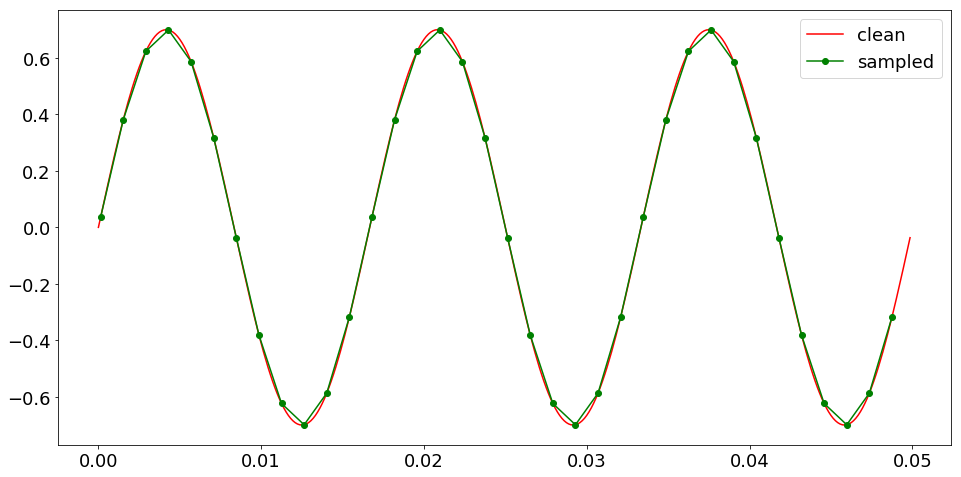

In [5]:
plt.plot(t,f_clean,color='r',label='clean')
plt.plot(t_s,f_clean_s,color='g',label='sampled',marker='o')
plt.legend()
plt.show()

# Half and Full-Cycle implementations

Testing on clean sin signal

In [6]:
#implementation of 4.25 4.26, 4.27, 4,28 from H09
#HALF-CYCLE
harm = 1
print('Harmonic ',harm) 

K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/K

for q in range(0,24):
    inp_vector = f_clean_s[6+q:6+ws+q] #moving data window of size ws, starting with 6th sample

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
   
    print('q =',q,' Yc =',Yc,' Ys =',Ys, ' |Y| =', np.sqrt(Yc**2 + Ys**2), 'ang =', np.arctan(Ys/Yc)/np.pi*180)

Harmonic  1
q = 0  Yc = 0.31779334981768353  Ys = -0.6237045669318572  |Y| = 0.7000000000000001 ang = -62.999999999999936
q = 1  Yc = -0.0366351693700596  Ys = -0.6990406743282018  |Y| = 0.7000000000000001 ang = 87.0000000000001
q = 2  Yc = -0.38124732451051785  Ys = -0.5870693975617975  |Y| = 0.7 ang = 57.000000000000114
q = 3  Yc = -0.6237045669318568  Ys = -0.3177933498176839  |Y| = 0.7 ang = 27.00000000000011
q = 4  Yc = -0.6990406743282016  Ys = 0.036635169370059395  |Y| = 0.6999999999999998 ang = -2.999999999999895
q = 5  Yc = -0.5870693975617975  Ys = 0.3812473245105178  |Y| = 0.7 ang = -32.999999999999886
q = 6  Yc = -0.31779334981768415  Ys = 0.6237045669318569  |Y| = 0.7000000000000001 ang = -62.99999999999988
q = 7  Yc = 0.03663516937005874  Ys = 0.6990406743282019  |Y| = 0.7000000000000001 ang = 87.00000000000016
q = 8  Yc = 0.3812473245105169  Ys = 0.587069397561798  |Y| = 0.6999999999999998 ang = 57.0000000000002
q = 9  Yc = 0.6237045669318562  Ys = 0.3177933498176847  |Y

In [7]:
#implementation of 4.25 4.26, 4.27, 4,28 from H09
#FULL-CYCLE
harm = 1
print('Harmonic ',harm) 

K = 12  #samples in cycle
ws = 12 #samples in window
theta = 2*np.pi/K

for q in range(0,24):
    inp_vector = f_clean_s[0+q:ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
   
    print('q =',q,' Yc =',Yc,' Ys =',Ys, ' |Y| =', np.sqrt(Yc**2 + Ys**2), 'ang =', np.arctan(Ys/Yc)/np.pi*180)

Harmonic  1
q = 0  Yc = -0.31779334981768315  Ys = 0.6237045669318574  |Y| = 0.7000000000000001 ang = -62.99999999999998
q = 1  Yc = 0.036635169370060124  Ys = 0.6990406743282017  |Y| = 0.7 ang = 87.00000000000006
q = 2  Yc = 0.38124732451051824  Ys = 0.5870693975617974  |Y| = 0.7000000000000001 ang = 57.00000000000008
q = 3  Yc = 0.6237045669318568  Ys = 0.31779334981768353  |Y| = 0.6999999999999997 ang = 27.000000000000085
q = 4  Yc = 0.6990406743282016  Ys = -0.03663516937005987  |Y| = 0.6999999999999998 ang = -2.999999999999934
q = 5  Yc = 0.5870693975617973  Ys = -0.3812473245105182  |Y| = 0.7 ang = -32.99999999999993
q = 6  Yc = 0.3177933498176837  Ys = -0.6237045669318569  |Y| = 0.7 ang = -62.99999999999991
q = 7  Yc = -0.03663516937005926  Ys = -0.6990406743282019  |Y| = 0.7000000000000002 ang = 87.00000000000011
q = 8  Yc = -0.38124732451051746  Ys = -0.5870693975617978  |Y| = 0.7 ang = 57.00000000000015
q = 9  Yc = -0.6237045669318566  Ys = -0.3177933498176843  |Y| = 0.7 ang 

As can be seen results of both algorithms are the same

## Effect of noise in the signal

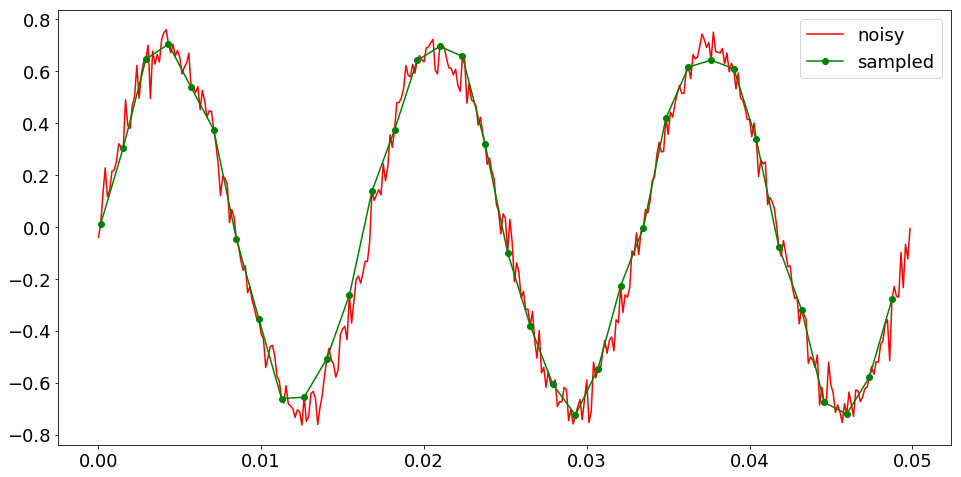

In [8]:
# Create a simple signal
f = 0.7*np.sin(2*np.pi*60*t)
f_noisy = f + 0.05*np.random.randn(len(t))

#sample the signal at 1/12 rate
t_s = t.reshape(36,10)[:,1]
f_noisy_s = f_noisy.reshape(36,10)[:,1]

plt.plot(t,f_noisy,color='r',label='noisy')
plt.plot(t_s,f_noisy_s,color='g',label='sampled',marker='o')
plt.legend()
plt.show()

## testing full and half cycle

In [9]:
#FULL-CYCLE
harm = 1
#print('Harmonic ',harm) 

K = 12  #samples in cycle
ws = 12 #samples in window
theta = 2*np.pi/K

Y_est_full = []
for q in range(0,24):
    inp_vector = f_noisy_s[0+q:ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_full.append(np.sqrt(Yc**2 + Ys**2))  
    #print('q =',q,' Yc =',Yc,' Ys =',Ys, ' |Y| =', np.sqrt(Yc**2 + Ys**2), 'ang =', np.arctan(Ys/Yc)/np.pi*180)

In [10]:
#HALF-CYCLE
harm = 1
#print('Harmonic ',harm) 

K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/K

Y_est_half = []
for q in range(0,24):
    inp_vector = f_noisy_s[6+q:6+ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_half.append(np.sqrt(Yc**2 + Ys**2))  
    #print('q =',q,' Yc =',Yc,' Ys =',Ys, ' |Y| =', np.sqrt(Yc**2 + Ys**2), 'ang =', np.arctan(Ys/Yc)/np.pi*180)

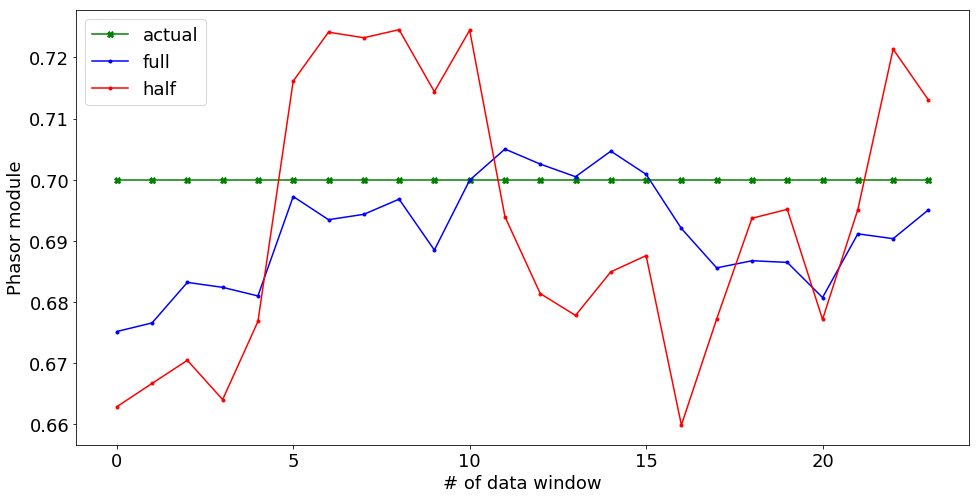

std(full) = 0.008567322241713478
std(half) = 0.021724315265761164


In [28]:
plt.plot(range(0,24),[0.7]*24,color='g',label='actual',marker='X')
plt.plot(range(0,24),Y_est_full,color='b',label='full',marker='.')
plt.plot(range(0,24),Y_est_half,color='r',label='half',marker='.')
plt.ylabel('Phasor module')
plt.xlabel('# of data window')
plt.legend()
plt.show()
print('std(full) =', np.std(Y_est_full))
print('std(half) =', np.std(Y_est_half))

Clearly the full-cycle is more precise

## DC offset

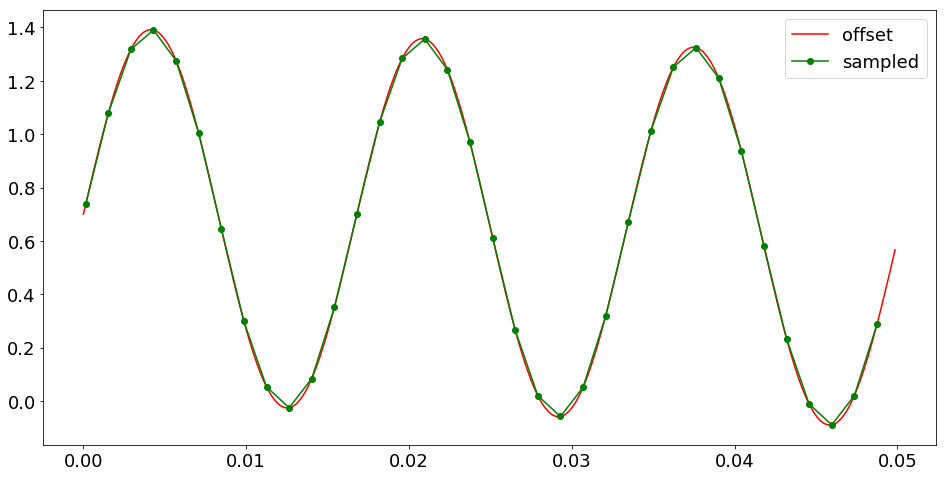

In [15]:
# Create a simple signal
f = 0.7*np.sin(2*np.pi*60*t)
exp = 0.7*np.exp(-3*t) #offset of + 3
f_offset = f + exp #+ 0.05*np.random.randn(len(t))

#sample the signal at 1/12 rate
t_s = t.reshape(36,10)[:,1]
f_offset_s = f_offset.reshape(36,10)[:,1]

plt.plot(t,f_offset,color='r',label='offset')
plt.plot(t_s,f_offset_s,color='g',label='sampled',marker='o')
plt.legend()
plt.show()

Testing full and half cycle methods

In [17]:
#FULL-CYCLE
harm = 1
K = 12  #samples in cycle
ws = 12 #samples in window
theta = 2*np.pi/K

Y_est_full_offset = []
for q in range(0,24):
    inp_vector = f_offset_s[0+q:ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_full_offset.append(np.sqrt(Yc**2 + Ys**2))

#HALF-CYCLE
K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/K

Y_est_half_offset = []
for q in range(0,24):
    inp_vector = f_offset_s[6+q:6+ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_half_offset.append(np.sqrt(Yc**2 + Ys**2))

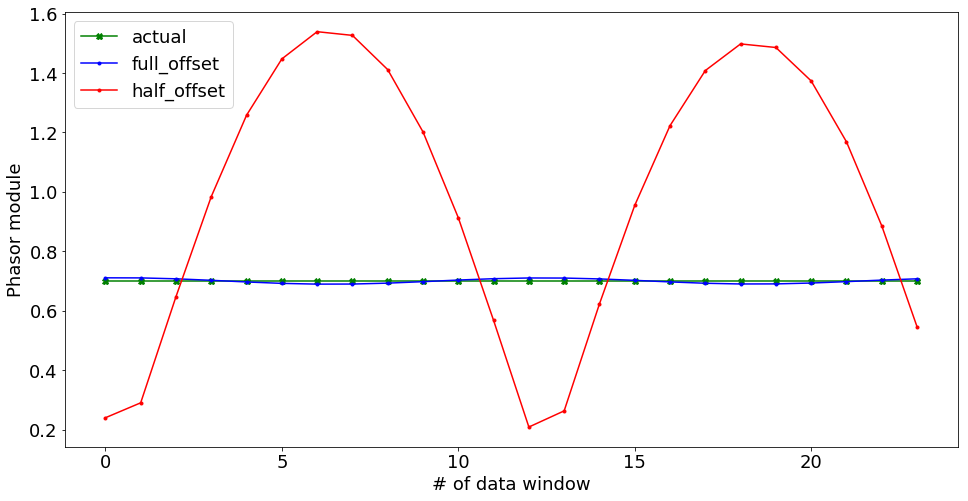

std(full_offset) = 0.007452199239219662
std(half_offset) = 0.4493003747665679


In [18]:
plt.plot(range(0,24),[0.7]*24,color='g',label='actual',marker='X')
plt.plot(range(0,24),Y_est_full_offset,color='b',label='full_offset',marker='.')
plt.plot(range(0,24),Y_est_half_offset,color='r',label='half_offset',marker='.')
plt.ylabel('Phasor module')
plt.xlabel('# of data window')
plt.legend()
plt.show()
print('std(full_offset) =', np.std(Y_est_full_offset))
print('std(half_offset) =', np.std(Y_est_half_offset))

Well, effect is well seen.

## Harmonics influence 

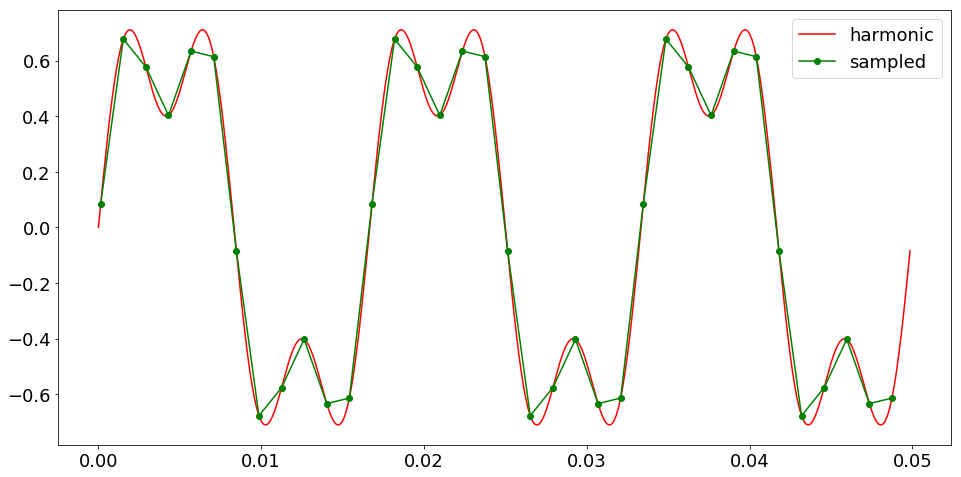

In [24]:
# Create a simple signal
f = 0.7*np.sin(2*np.pi*60*t)
f_harm = f + 0.3*np.sin(3*2*np.pi*60*t)# + 0.15*np.sin(5*2*np.pi*60*t) #+ 0.03*np.random.randn(len(t))

#sample the signal at 1/12 rate
t_s = t.reshape(36,10)[:,1]
f_harm_s = f_harm.reshape(36,10)[:,1]

plt.plot(t,f_harm,color='r',label='harmonic')
plt.plot(t_s,f_harm_s,color='g',label='sampled',marker='o')
plt.legend()
plt.show()

In [25]:
#fundamental harmonic estimation
#FULL-CYCLE
harm = 1
K = 12  #samples in cycle
ws = 12 #samples in window
theta = 2*np.pi/K

Y_est_full_h1 = []
for q in range(0,24):
    inp_vector = f_harm_s[0+q:ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_full_h1.append(np.sqrt(Yc**2 + Ys**2))

#HALF-CYCLE
K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/K

Y_est_half_h1 = []
for q in range(0,24):
    inp_vector = f_harm_s[6+q:6+ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_half_h1.append(np.sqrt(Yc**2 + Ys**2))

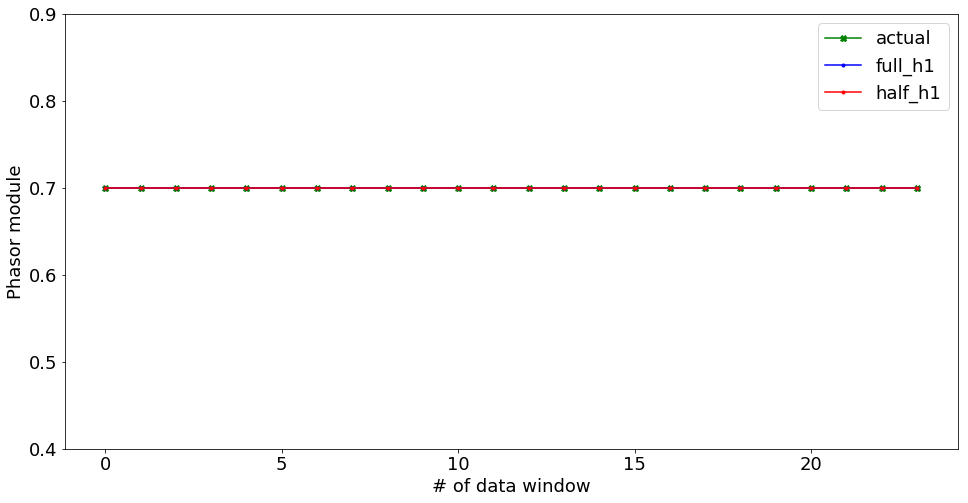

In [29]:
plt.plot(range(0,24),[0.7]*24,color='g',label='actual',marker='X')
plt.plot(range(0,24),Y_est_full_h1,color='b',label='full_h1',marker='.')
plt.plot(range(0,24),Y_est_half_h1,color='r',label='half_h1',marker='.')
plt.ylabel('Phasor module')
plt.xlabel('# of data window')
plt.ylim([0.4,0.9])
plt.legend()
plt.show()

Method is adversly affected by harmonic presence.

In [30]:
#3rd harmonic estimation
#FULL-CYCLE
harm = 3
K = 12  #samples in cycle
ws = 12 #samples in window
theta = 2*np.pi/(K)

Y_est_full_h3 = []
for q in range(0,24):
    inp_vector = f_harm_s[0+q:ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_full_h3.append(np.sqrt(Yc**2 + Ys**2))

#HALF-CYCLE
K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/(K)

Y_est_half_h3 = []
for q in range(0,24):
    inp_vector = f_harm_s[6+q:6+ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_half_h3.append(np.sqrt(Yc**2 + Ys**2))

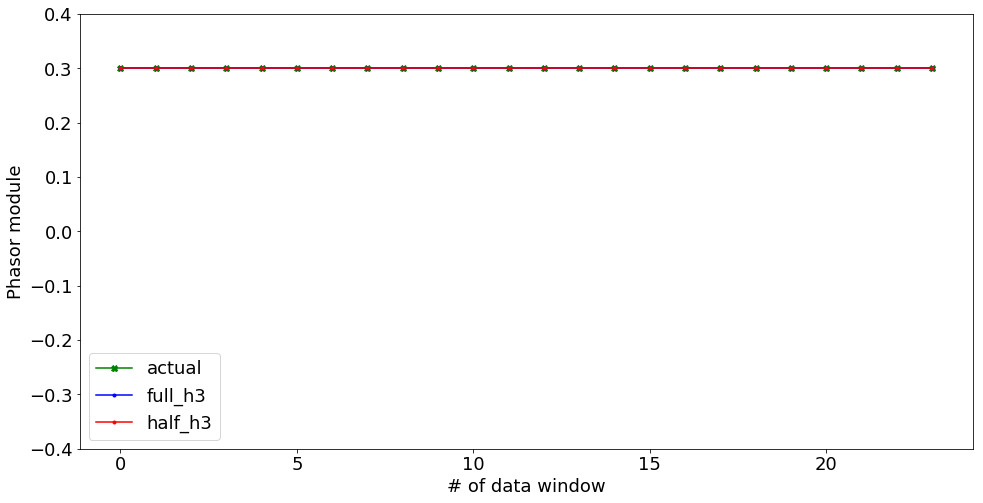

In [31]:
plt.plot(range(0,24),[0.3]*24,color='g',label='actual',marker='X')
plt.plot(range(0,24),Y_est_full_h3,color='b',label='full_h3',marker='.')
plt.plot(range(0,24),Y_est_half_h3,color='r',label='half_h3',marker='.')
plt.ylabel('Phasor module')
plt.xlabel('# of data window')
plt.legend()
plt.ylim([-0.4,0.4])
plt.show()

In [32]:
#5th harmonic estimation
#FULL-CYCLE
harm = 5
K = 12  #samples in cycle
ws = 12 #samples in window
theta = 2*np.pi/K

Y_est_full_h5 = []
for q in range(0,24):
    inp_vector = f_harm_s[0+q:ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_full_h5.append(np.sqrt(Yc**2 + Ys**2))

#HALF-CYCLE
K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/K

Y_est_half_h5 = []
for q in range(0,24):
    inp_vector = f_harm_s[6+q:6+ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_half_h5.append(np.sqrt(Yc**2 + Ys**2))

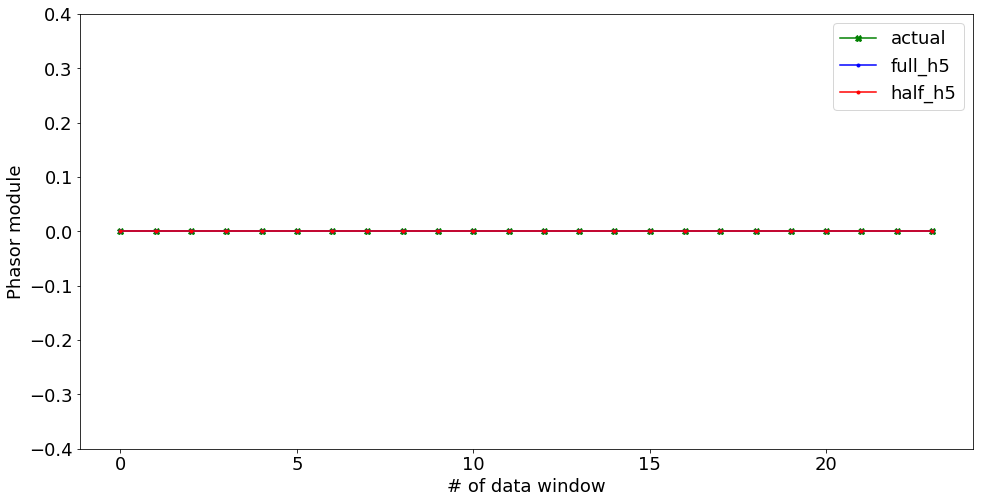

In [34]:
plt.plot(range(0,24),[0.0]*24,color='g',label='actual',marker='X')
plt.plot(range(0,24),Y_est_full_h5,color='b',label='full_h5',marker='.')
plt.plot(range(0,24),Y_est_half_h5,color='r',label='half_h5',marker='.')
plt.ylabel('Phasor module')
plt.xlabel('# of data window')
plt.legend()
plt.ylim([-0.4,0.4])
plt.show()

The method is capable of estimating the non-fundamental harmonics in the signal

## Effect of frequency change

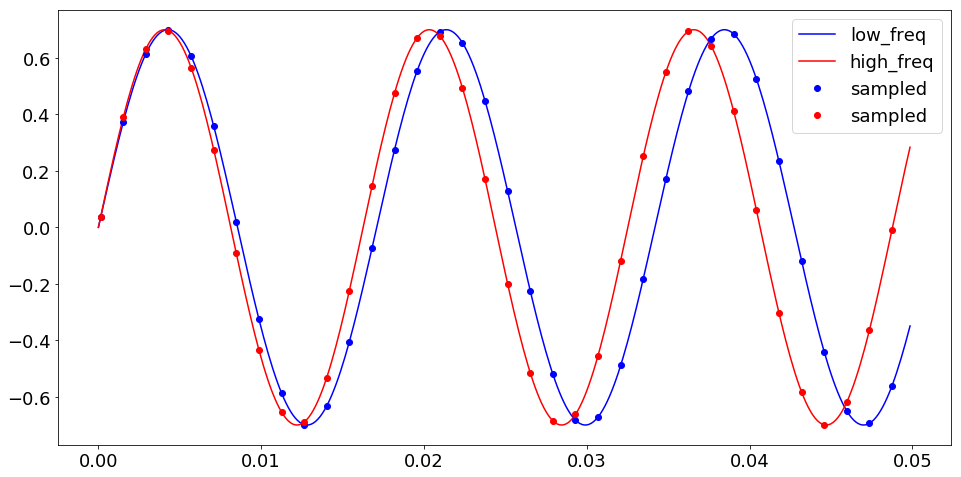

In [35]:
# Create a simple signal
df = 1.5 #freq offset in Hz
f_low =  0.7*np.sin(2*np.pi*(60 - df)*t) #adding +/-0.5Hz
f_high = 0.7*np.sin(2*np.pi*(60 + df)*t) #adding +/-0.5Hz

#sample the signal at 1/12 rate
t_s = t.reshape(36,10)[:,1]
f_low_s = f_low.reshape(36,10)[:,1]
f_high_s = f_high.reshape(36,10)[:,1]


plt.plot(t,f_low,color='b',label='low_freq')
plt.plot(t,f_high,color='r',label='high_freq')

plt.plot(t_s,f_low_s,color='b',label='sampled',linestyle="",marker='o')
plt.plot(t_s,f_high_s,color='r',label='sampled',linestyle="",marker='o')

plt.legend()
plt.show()

In [36]:
#testing for low frequency
#FULL-CYCLE
harm = 1
K = 12  #samples in cycle
ws = 12 #samples in window
theta = 2*np.pi/K

Y_est_full_low = []
for q in range(0,24):
    inp_vector = f_low_s[0+q:ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_full_low.append(np.sqrt(Yc**2 + Ys**2))

#HALF-CYCLE
K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/K

Y_est_half_low = []
for q in range(0,24):
    inp_vector = f_low_s[6+q:6+ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_half_low.append(np.sqrt(Yc**2 + Ys**2))

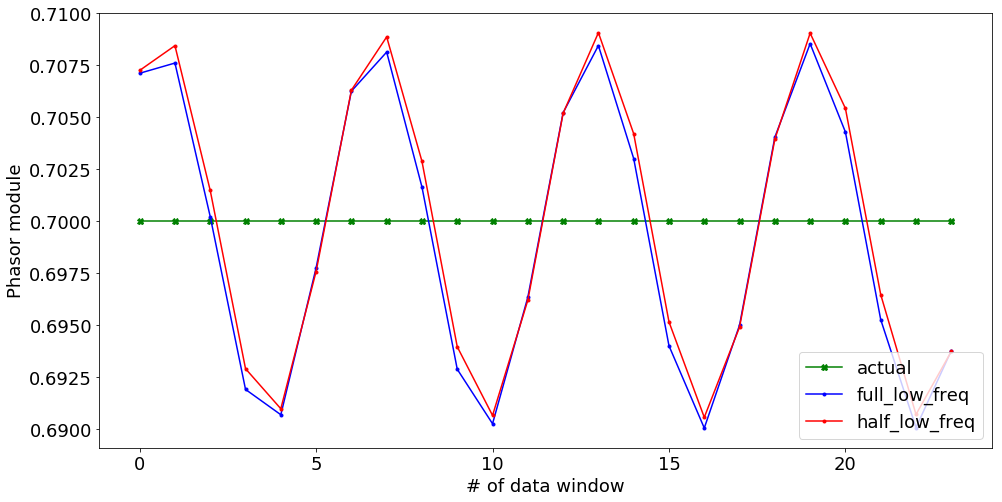

mean(full_low_f) = 0.6992715510186608
mean(half_low_f) = 0.6998300200959989


In [37]:
plt.plot(range(0,24),[0.7]*24,color='g',label='actual',marker='X')
plt.plot(range(0,24),Y_est_full_low,color='b',label='full_low_freq',marker='.')
plt.plot(range(0,24),Y_est_half_low,color='r',label='half_low_freq',marker='.')
plt.ylabel('Phasor module')
plt.xlabel('# of data window')
plt.legend()
plt.show()
print('mean(full_low_f) =', np.mean(Y_est_full_low))
print('mean(half_low_f) =', np.mean(Y_est_half_low))

In [38]:
#testing for high frequency
#FULL-CYCLE
harm = 1
K = 12  #samples in cycle
ws = 12 #samples in window
theta = 2*np.pi/K

Y_est_full_high = []
for q in range(0,24):
    inp_vector = f_high_s[0+q:ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_full_high.append(np.sqrt(Yc**2 + Ys**2))

#HALF-CYCLE
K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/K

Y_est_half_high = []
for q in range(0,24):
    inp_vector = f_high_s[6+q:6+ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_half_high.append(np.sqrt(Yc**2 + Ys**2))

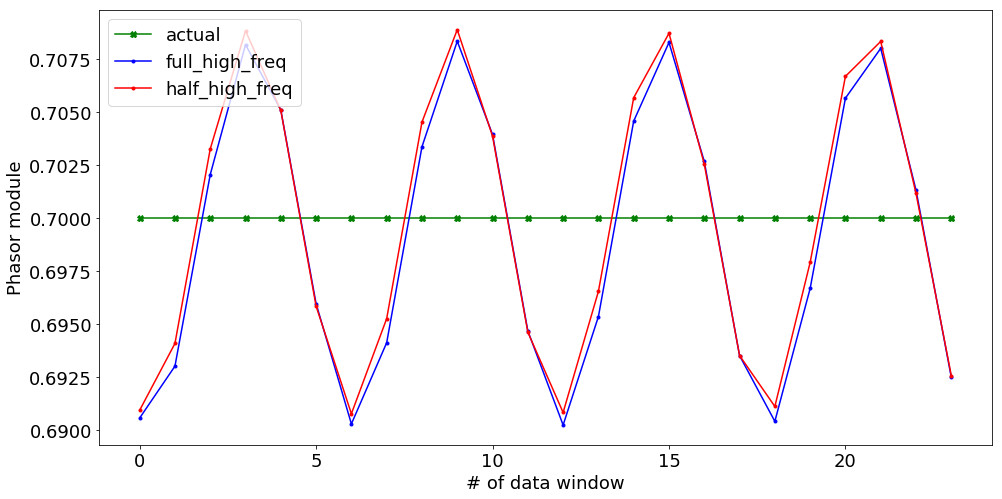

mean(full_high_f) = 0.6991138054707958
mean(half_high_f) = 0.699645230416062


In [39]:
plt.plot(range(0,24),[0.7]*24,color='g',label='actual',marker='X')
plt.plot(range(0,24),Y_est_full_high,color='b',label='full_high_freq',marker='.')
plt.plot(range(0,24),Y_est_half_high,color='r',label='half_high_freq',marker='.')
plt.ylabel('Phasor module')
plt.xlabel('# of data window')
plt.legend()
plt.show()
print('mean(full_high_f) =', np.mean(Y_est_full_high))
print('mean(half_high_f) =', np.mean(Y_est_half_high))

The frequency change leads to swings in estimation of a phasor.  
The more is the frequency offset the more is amplitude of swings of phasor estimation.

## Effect of increased samples in a period

Going to use the same noisy signal, but resample it at twice sampling rate: 24 samples per cycle.

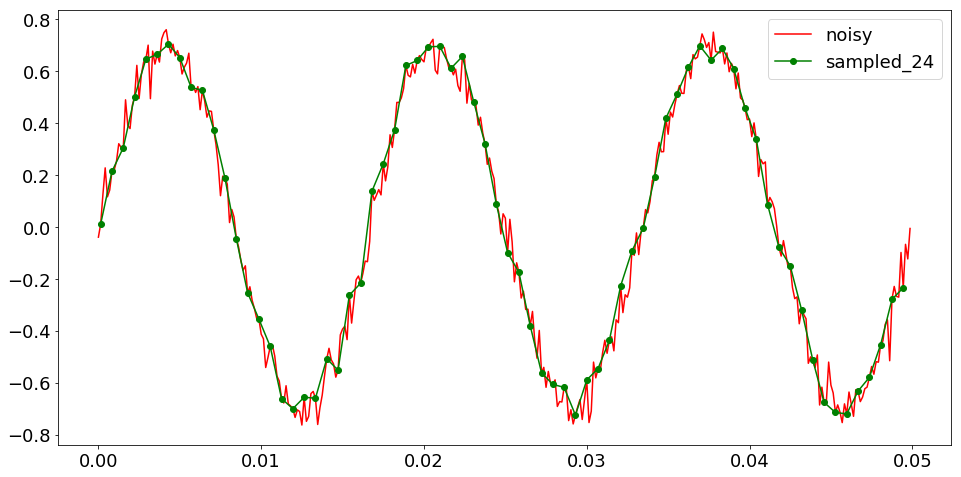

In [40]:
#resampling
#sample the signal at 1/24 rate
t_s_24 = t.reshape(72,5)[:,1]
f_noisy_s_24 = f_noisy.reshape(72,5)[:,1]

plt.plot(t,f_noisy,color='r',label='noisy')
plt.plot(t_s_24,f_noisy_s_24,color='g',label='sampled_24',marker='o')
plt.legend()
plt.show()

In [41]:
#FULL-CYCLE
harm = 1
K = 24  #samples in cycle
ws = 24 #samples in window
theta = 2*np.pi/K

Y_est_full_24 = []
for q in range(0,48):
    inp_vector = f_noisy_s_24[0+q:ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_full_24.append(np.sqrt(Yc**2 + Ys**2))

#HALF-CYCLE
K = 24  #samples in cycle
ws = 12 #samples in window
theta = 2*np.pi/K

Y_est_half_24 = []
for q in range(0,48):
    inp_vector = f_noisy_s_24[6+q:6+ws+q] #moving data window of size ws

    Yc,Ys = 0,0
    for k in range(1,ws+1):
        Yc = Yc + 2/ws*inp_vector[k-1]*np.cos(k*theta*harm)
        Ys = Ys + 2/ws*inp_vector[k-1]*np.sin(k*theta*harm)
    Y_est_half_24.append(np.sqrt(Yc**2 + Ys**2))

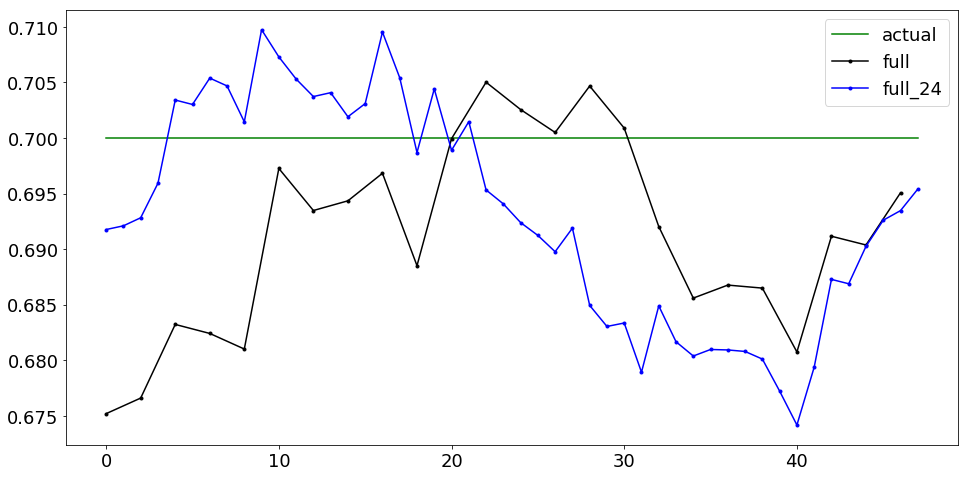

std(full) = 0.008567322241713478
std(full_24) = 0.009831833735926103


In [42]:
plt.plot(range(0,48),[0.7]*24*2,color='g',label='actual')
plt.plot(range(0,48,2),Y_est_full,color='black',label='full',marker='.')
plt.plot(range(0,48),Y_est_full_24,color='b',label='full_24',marker='.')
plt.legend()
plt.show()
print('std(full) =', np.std(Y_est_full))
print('std(full_24) =', np.std(Y_est_full_24))

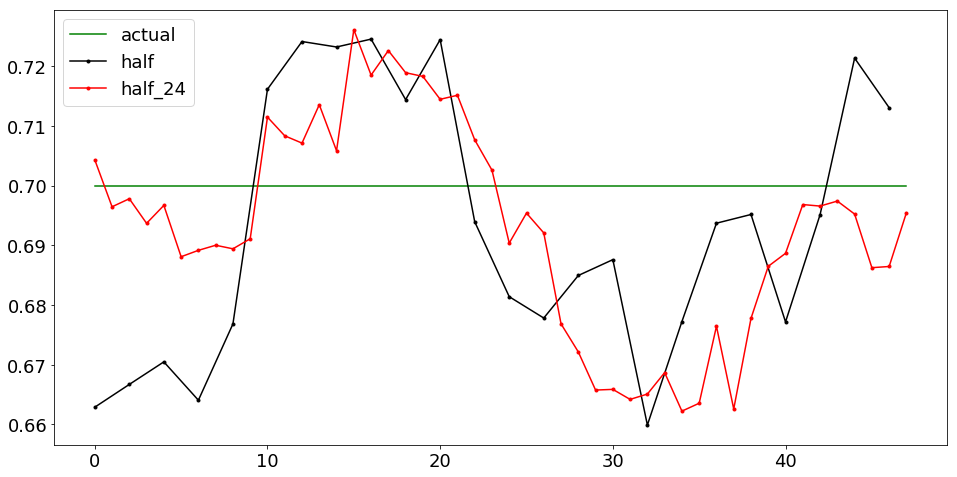

std(half) = 0.021724315265761164
std(half_24) = 0.017457166493699366


In [43]:
plt.plot(range(0,48),[0.7]*24*2,color='g',label='actual')
plt.plot(range(0,48,2),Y_est_half,color='black',label='half',marker='.')
plt.plot(range(0,48),Y_est_half_24,color='r',label='half_24',marker='.')
plt.legend()
plt.show()
print('std(half) =', np.std(Y_est_half))
print('std(half_24) =', np.std(Y_est_half_24))

The increase in accuracy is not observed by the increased sampling rate

## Demonstration of phasor rotation

The resultant phasor is rotating in complex plain with speed of theta = 2*pi/K = pi/6 = 30 deg.  
The implementation if of complex form for half-cycle method

In [32]:
#define exp(-j*k*pi/6)
def w(k):
    return np.exp(-1j * k * np.pi / 6)

In [33]:
#moving window of half cycle aka 6 points, estimating phasor from measurements
def phasor_est(q): #q is the number of data window [0:30]
    window_set = f_clean_s[0+q:6+q]
    X = 0
    for k in range(6):
        X = X + 1/3 * window_set[k] * w(k)
    print('|Y| =',np.abs(X),'ang =',np.angle(X, deg = True))
    #plot the phasor
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
    plt.arrow(0, 0, np.angle(X), np.abs(X),color='r')
    plt.show()

|Y| = 0.7 ang = -87.00000000000001


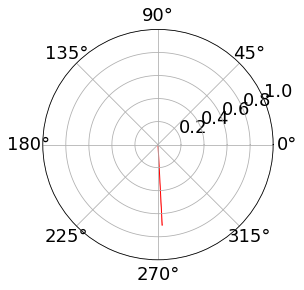

In [34]:
phasor_est(0)

|Y| = 0.7000000000000001 ang = -57.00000000000003


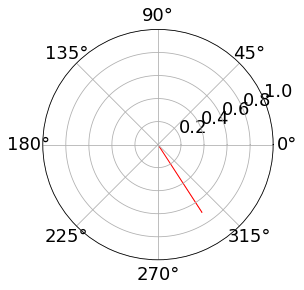

In [35]:
phasor_est(1)

|Y| = 0.7 ang = -27.00000000000005


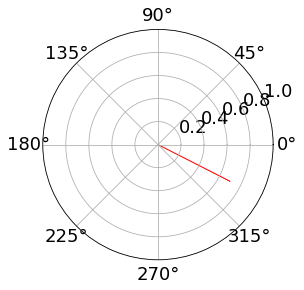

In [36]:
phasor_est(2)

|Y| = 0.6999999999999998 ang = 2.999999999999951


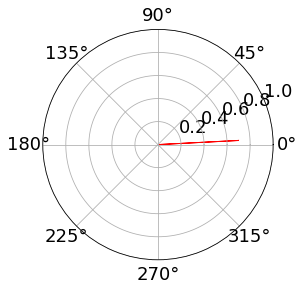

In [37]:
phasor_est(3)

|Y| = 0.7 ang = -87.00000000000001


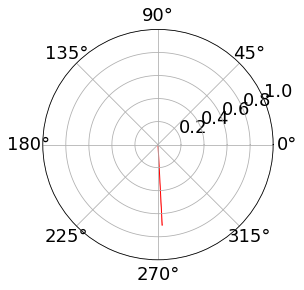

|Y| = 0.7000000000000001 ang = -57.00000000000003


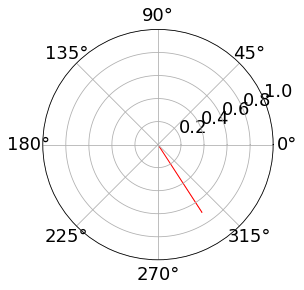

|Y| = 0.7 ang = -27.00000000000005


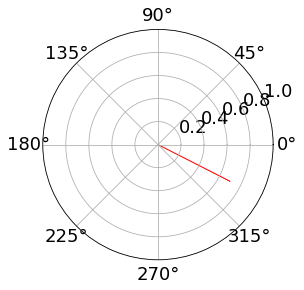

|Y| = 0.6999999999999998 ang = 2.999999999999951


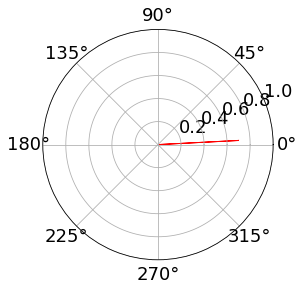

|Y| = 0.6999999999999998 ang = 32.99999999999995


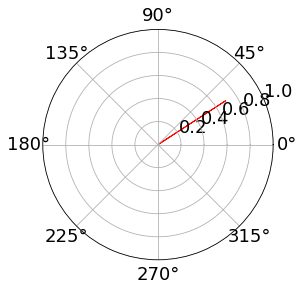

|Y| = 0.7 ang = 62.99999999999995


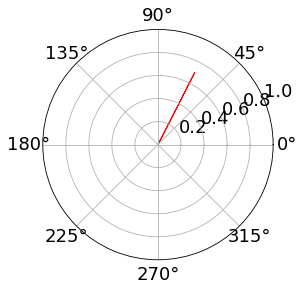

|Y| = 0.7000000000000001 ang = 92.99999999999994


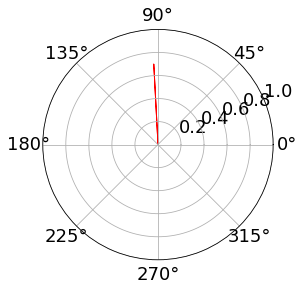

|Y| = 0.7000000000000002 ang = 122.9999999999999


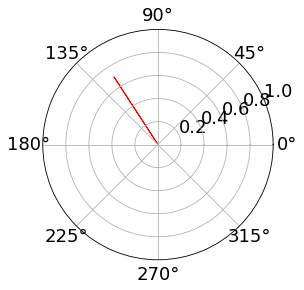

|Y| = 0.7 ang = 152.9999999999999


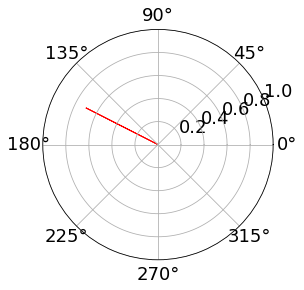

|Y| = 0.6999999999999998 ang = -177.0000000000001


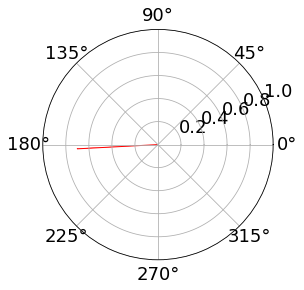

|Y| = 0.7 ang = -147.0000000000001


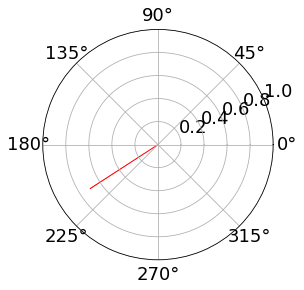

|Y| = 0.7 ang = -117.00000000000013


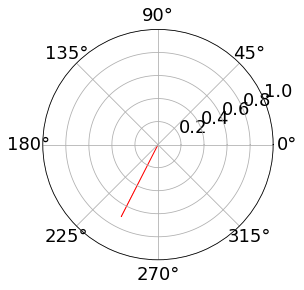

|Y| = 0.7000000000000002 ang = -87.00000000000013


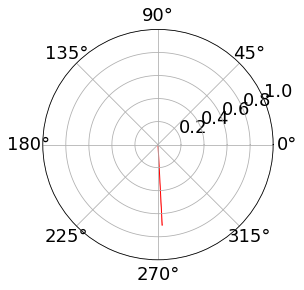

|Y| = 0.7000000000000001 ang = -57.00000000000016


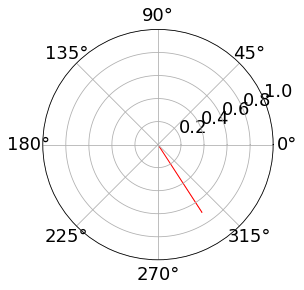

|Y| = 0.7 ang = -27.00000000000019


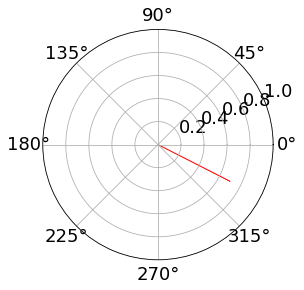

|Y| = 0.6999999999999998 ang = 2.9999999999998024


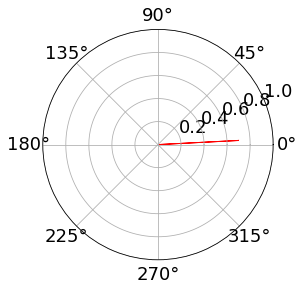

|Y| = 0.6999999999999997 ang = 32.99999999999981


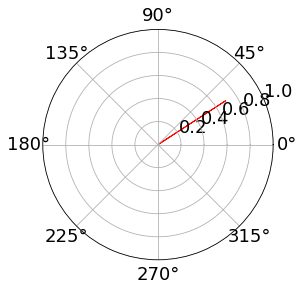

|Y| = 0.6999999999999998 ang = 62.999999999999794


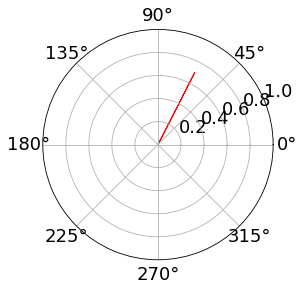

|Y| = 0.7000000000000001 ang = 92.99999999999977


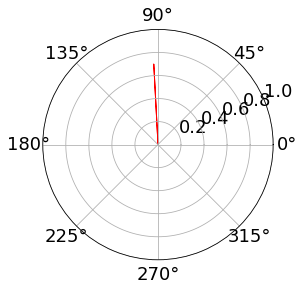

|Y| = 0.7000000000000002 ang = 122.99999999999976


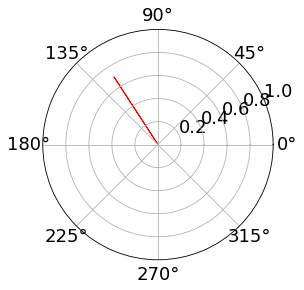

|Y| = 0.7000000000000004 ang = 152.9999999999998


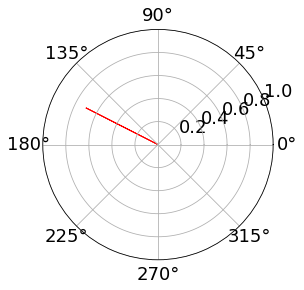

|Y| = 0.7000000000000001 ang = -177.00000000000023


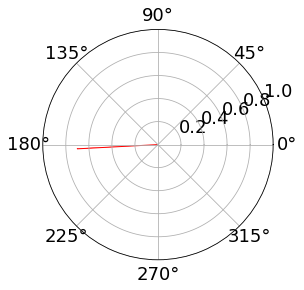

|Y| = 0.7000000000000001 ang = -147.00000000000026


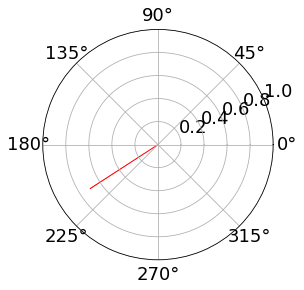

|Y| = 0.7000000000000001 ang = -117.00000000000023


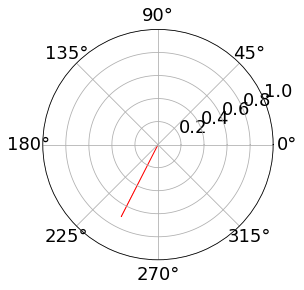

In [38]:
#for several windows:
for q in range(24):
    phasor_est(q)

## Implementation of algorithm for windows not multiples of half-cycle

In [416]:
#implementation of 4.29 from H09 for any number of samples
#does not work for ws other than 6 and 12
#Y = A(-1)*y

harm = 1
print('Harmonic ',harm) 

K = 12  #samples in cycle
ws = 3 #samples in window
theta = 2*np.pi/K

for q in range(0,24):
    inp_vector = f_clean_s[0+q:ws+q]


    A11,A12,A21,A22=0,0,0,0
    y1,y2 = 0,0
    for k in range(1, ws+1):
        A11 = A11+np.cos(k*theta)**2
        A12 = A12+np.cos(k*theta)*np.sin(k*theta)
        A21 = A12
        A22 = A22+np.sin(k*theta)**2
        
        y1 = y1+inp_vector[k-1]*np.cos(k*theta)
        y2 = y2+inp_vector[k-1]*np.sin(k*theta)

    A = np.array([[A11, A12],
                  [A21, A22]])
    A_inv = np.linalg.inv(A)
    y = np.array([y1, y2]).T
    Yhat = np.matmul(A_inv, y)
    Yc,Ys = Yhat[0],Yhat[1]

    print('q =',q,' Yc =',Yc,' Ys =',Ys, ' |Y| =', np.sqrt(Yc**2 + Ys**2))

Harmonic  1
q = 0  Yc = -0.05565115704647994  Ys = 0.600249057684098  |Y| = 0.6028233427226086
q = 1  Yc = 0.45921775421732747  Ys = 0.4578812073192531  |Y| = 0.6484875833850194
q = 2  Yc = 0.2598329844354157  Ys = 0.4868492363017924  |Y| = 0.5518472240468855
q = 3  Yc = 0.1679831860486577  Ys = 0.6360410592159415  |Y| = 0.6578499675485245
q = 4  Yc = 0.7371252401431027  Ys = 0.053739909913238626  |Y| = 0.7390815906065512
q = 5  Yc = 1.220260977282844  Ys = -0.7595310941097522  |Y| = 1.4373323678254932
q = 6  Yc = 0.05565115704648116  Ys = -0.6002490576840982  |Y| = 0.6028233427226088
q = 7  Yc = -0.4592177542173277  Ys = -0.45788120731925297  |Y| = 0.6484875833850196
q = 8  Yc = -0.25983298443541525  Ys = -0.48684923630179255  |Y| = 0.5518472240468855
q = 9  Yc = -0.16798318604865714  Ys = -0.6360410592159422  |Y| = 0.6578499675485251
q = 10  Yc = -0.7371252401431019  Ys = -0.05373990991324029  |Y| = 0.7390815906065505
q = 11  Yc = -1.220260977282845  Ys = 0.7595310941097512  |Y| = 1.